In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import powerlaw

In [2]:
data = np.genfromtxt('data/ajax-2D-time-series-ALL-tracks-362.txt', delimiter=',') 

In [3]:
T=1441 # 3479

In [4]:
tracks=[]
m=[[],[],[]]
m[0].append(data[0,0])
m[1].append(data[0,1])
m[2].append(data[0,2])
for i in range(1,len(data[:,1])):
    if data[i,0] - data[i-1,0] == 1:
        m[0].append(data[i,0])
        m[1].append(data[i,1])
        m[2].append(data[i,2])
    else:
        tracks.append(m)
        m=[[],[],[]]
        m[0].append(data[i,0])
        m[1].append(data[i,1])
        m[2].append(data[i,2])
    if i == (len(data[:,1]) - 1):
        tracks.append(m)

In [5]:
tracks1=np.asarray(tracks,dtype=object)

In [6]:
data = np.genfromtxt('data/armin-2D-time-series-ALL-tracks-1048.txt', delimiter=',')

In [7]:
T=3479

In [8]:
tracks=[]
m=[[],[],[]]
m[0].append(data[0,0])
m[1].append(data[0,1])
m[2].append(data[0,2])
for i in range(1,len(data[:,1])):
    if data[i,0] - data[i-1,0] == 1:
        m[0].append(data[i,0])
        m[1].append(data[i,1])
        m[2].append(data[i,2])
    else:
        tracks.append(m)
        m=[[],[],[]]
        m[0].append(data[i,0])
        m[1].append(data[i,1])
        m[2].append(data[i,2])
    if i == (len(data[:,1]) - 1):
        tracks.append(m)

In [9]:
tracks2=np.asarray(tracks,dtype=object)

In [10]:
len(tracks1),len(tracks2)

(362, 1048)

In [11]:
df_APcoords = pd.read_csv('sensor_locations.csv', sep=',')
df_APcoords = df_APcoords[:593]
df_APcoords.columns = ['x_m','y_m']
APcoords = {}
for i in range(len(df_APcoords)):
    APcoords[df_APcoords.values[i][0]] = [df_APcoords.values[i][0], df_APcoords.values[i][1]]

In [12]:
cols=['k','b','red','cyan','m','lime','brown','orange','g']

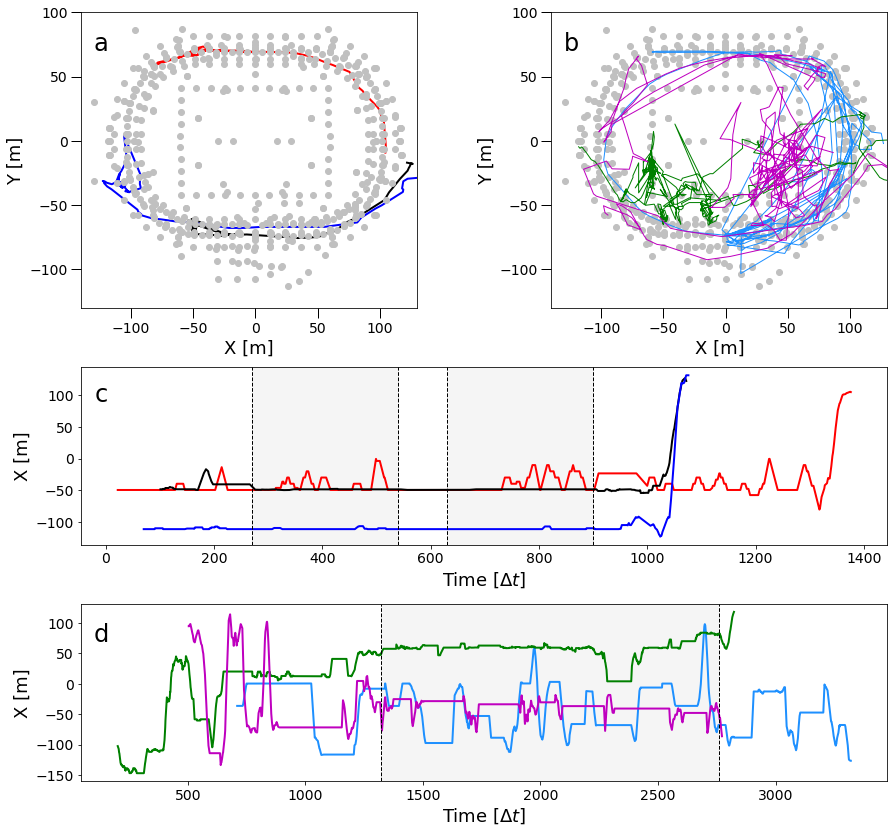

In [13]:
fig = plt.figure(figsize=(14,12))

grid = plt.GridSpec(7,2,left=0.1, bottom=0.06, right=None, top=0.95, wspace=0.4, hspace=1)
p0=fig.add_subplot(grid[:3, 0])
p1=fig.add_subplot(grid[:3, 1])
p2=fig.add_subplot(grid[3:5, :])
p3=fig.add_subplot(grid[5:, :])
s=14

## ------------------------------------------------------------------------- 
cols=['red','k','b']
for k,i in enumerate([23,24,71]):
    p0.plot(tracks1[i][1],np.array(tracks1[i][2])*(-1),color=cols[k],linewidth=2)
p0.plot(df_APcoords['x_m'].values, df_APcoords['y_m'].values*(-1),'o', color='silver', markersize=6)

p0.tick_params(axis='both',length=10,width=1,which='major')
for tick in p0.xaxis.get_major_ticks():
    tick.label.set_fontsize(s)
for tick in p0.yaxis.get_major_ticks():
    tick.label.set_fontsize(s)
p0.set_xlabel('X [m]',fontsize=18)
p0.set_ylabel('Y [m]',fontsize=18)
p0.text(-130, 70, 'a', fontsize=24)
p0.set_xlim([-140,130])
p0.set_ylim([-130,100])

## ------------------------------------------------------------------------- 
cols=['dodgerblue','green','m'] # ['red','k','b']
p1.plot(df_APcoords['x_m'].values, df_APcoords['y_m'].values*(-1),'o', color='silver', markersize=6)
for k,i in enumerate([61,68,74]):
    p1.plot(tracks2[i][1],np.array(tracks2[i][2])*(-1),color=cols[k],linewidth=1)

p1.tick_params(axis='both',length=10,width=1,which='major')
for tick in p1.xaxis.get_major_ticks():
    tick.label.set_fontsize(s)
for tick in p1.yaxis.get_major_ticks():
    tick.label.set_fontsize(s)
p1.set_xlabel('X [m]',fontsize=18)
p1.set_ylabel('Y [m]',fontsize=18)
p1.text(-130, 70, 'b', fontsize=24)
p1.set_xlim([-140,130])
p1.set_ylim([-130,100])

## ------------------------------------------------------------------------- 

cols=['red','k','b']
for k,i in enumerate([23,24,71]):
    p2.plot(tracks1[i][0],np.array(tracks1[i][1]),color=cols[k],linewidth=2)
p2.axvspan(270,540, color='whitesmoke') #alpha=0.08, color='grey')
p2.axvspan(630,900, color='whitesmoke') #alpha=0.08, color='grey')
p2.axvline(270, color='k', linestyle='--',linewidth=1)
p2.axvline(540, color='k', linestyle='--',linewidth=1)
p2.axvline(630, color='k', linestyle='--',linewidth=1)
p2.axvline(900, color='k', linestyle='--',linewidth=1)
for tick in p2.xaxis.get_major_ticks():
    tick.label.set_fontsize(s)
for tick in p2.yaxis.get_major_ticks():
    tick.label.set_fontsize(s)
p2.text(-20, 90, 'c', fontsize=24)
p2.set_ylabel('X [m]',fontsize=18)
p2.set_xlabel('Time [' + r'$\Delta t$' + ']', fontsize=18)

## ------------------------------------------------------------------------- 

cols=['dodgerblue','green','m']
for k,i in enumerate([61,68,74]):
    p3.plot(tracks2[i][0],np.array(tracks2[i][1])*(-1),color=cols[k],linewidth=2)
p3.axvspan(1320,2760, color='whitesmoke')#, alpha=0.08, color='grey')
p3.axvline(1320, color='k',linestyle='dashed',linewidth=1)
p3.axvline(2760, color='k',linestyle='dashed',linewidth=1)
for tick in p3.xaxis.get_major_ticks():
    tick.label.set_fontsize(s)
for tick in p3.yaxis.get_major_ticks():
    tick.label.set_fontsize(s)
p3.text(100, 70, 'd', fontsize=24)
p3.set_ylabel('X [m]',fontsize=18)
p3.set_xlabel('Time [' + r'$\Delta t$' + ']', fontsize=18)

#plt.savefig('Figure01.eps')

plt.show()

# Waiting times

In [14]:
def getWaitingtimes(m1, m2, waitingtimes):
    waitingtime = 0
    for i in range(len(m1)):
        cx = int((m1[i] + 150) / 10)
        cy = int((m2[i] + 100) / 10)
        loc_new = [cx,cy]
        if i > 0:
            if loc_new == loc_old:
                waitingtime += 1
            else:
                if waitingtime > 0:
                    waitingtimes.append(waitingtime)
                    waitingtime = 0
        loc_old = loc_new
    return waitingtimes

In [15]:
waitingtimes=[]
for i in range(len(tracks2)):
    waitingtimes = getWaitingtimes(tracks2[i][1],tracks2[i][2], waitingtimes)

In [16]:
len(waitingtimes)

145802

In [ ]:
#np.savetxt('waitingtimes.txt', waitingtimes, delimiter=' ')